In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
"""
Analiza głównych składowych, PCA
(Metoda: uczenie nienadzorowane, zasotosowanie: redukcja wymiarów, wizualizacja) 
Laboratorium 6
"""

In [ ]:
"""Problem 1

Proszę o pobranie danych ze źródła:
https://archive.ics.uci.edu/dataset/53/iris

Zbiór danych dotyczy kilku rodzajów irysów. Każdy irys jest opisany za pomocą 4 cech (długość działki kielicha i szerokość działki kielicha, długość i szerokość płatka). Wykorzystując regresję logistyczną należy zastosować PCA do wizualizacji danych.


Przygotowanie danych:
1. Wczytanie danych.
2. Sprawdzenie kompletności danych.
3. Sprawdzenie statystyk podstawowych, informacji nt. danych.
4. Sprawdzenie liczby gatunków irysów.
5. Wykres punktowy zależności długości płatka w funkcji szerokości płatka, dane różnicowane za pomocą gatunku/rodzaju.
6. Wykres punktowy zależności długości kielicha w funkcji szerokości kielicha, dane różnicowane za pomocą gatunku/rodzaju.
7. Wykres porównawczgo składającego się z macierzy par wszystkich zmiennych, różnicowanych na podstawie kolumny 'species'.
8. Mapa (heatmapa) korelacji."""

In [10]:
#1. Wczytanie danych
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(url, names=names)

In [15]:
#2. Sprawdzenie kompletności danych
iris_data.info()

#dane są kompletne - brak missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
#3.Sprawdzenie statystyk podstawowych, informacji nt. danych
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
#4. Sprawdzenie liczby gatunków irysów
iris_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

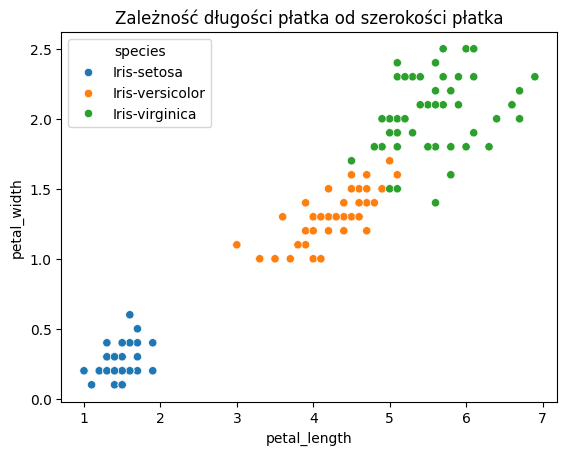

In [19]:
#5. Wykres punktowy długości płatka vs. szerokość płatka
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=iris_data)
plt.title('Zależność długości płatka od szerokości płatka')
plt.show()

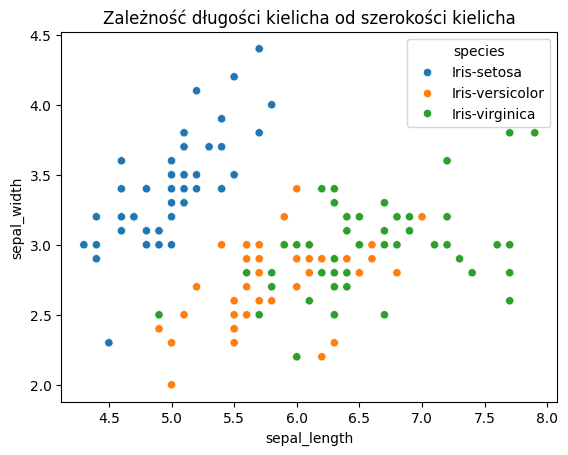

In [20]:
#6. Wykres punktowy długości kielicha vs. szerokość kielicha
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris_data)
plt.title('Zależność długości kielicha od szerokości kielicha')
plt.show()

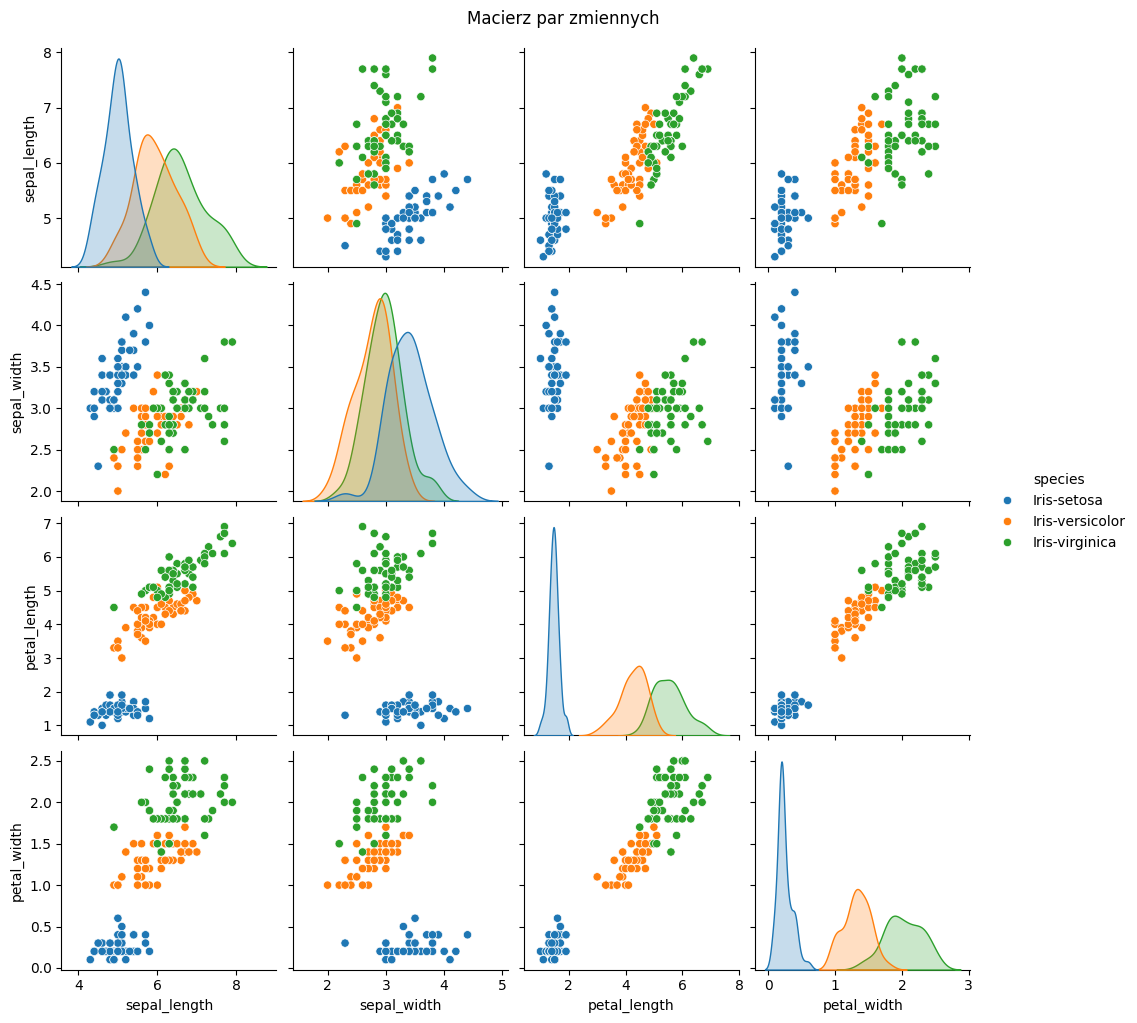

In [21]:
#7. Wykres porównawczy macierzy par zmiennych
sns.pairplot(iris_data, hue='species')
plt.suptitle('Macierz par zmiennych', y=1.02)
plt.show()

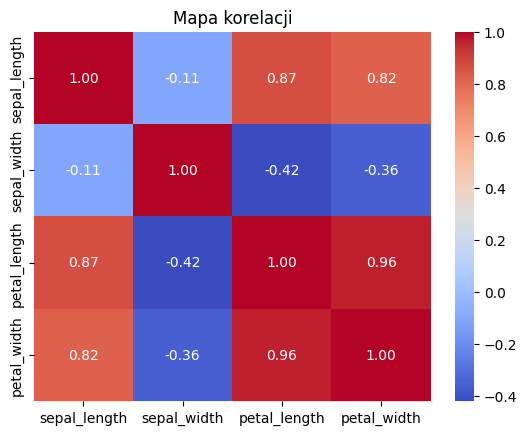

In [23]:
#8. Heatmapa korelacji
correlation_matrix = iris_data.drop('species', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa korelacji')
plt.show()

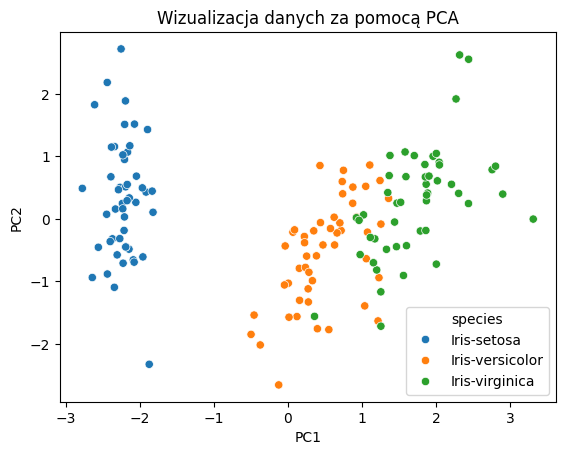

In [24]:
#9. Zastosowanie PCA do wizualizacji danych
X = iris_data.iloc[:, :-1]  # Wszystkie kolumny oprócz 'species'
y = iris_data['species']

# Standaryzacja danych
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Redukcja wymiarowości za pomocą PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Dodanie składowych do DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# Wykres 2D PCA
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca_df)
plt.title('Wizualizacja danych za pomocą PCA')
plt.show()

In [25]:
#1. Skalowanie danych (standaryzacja)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [26]:
#2. Wyznaczenie 2 składowych głównych
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

In [27]:
#3. Procentowa wyjaśniona wariancja przez poszczególne składowe główne
explained_variance_ratio = pca.explained_variance_ratio_
print("Procentowa wyjaśniona wariancja przez poszczególne składowe główne:")
print(explained_variance_ratio)

Procentowa wyjaśniona wariancja przez poszczególne składowe główne:
[0.72770452 0.23030523]


In [28]:
#4. Wagi składowych głównych dla poszczególnych cech
components_weights = pca.components_
print("\nWagi składowych głównych dla poszczególnych cech:")
print(components_weights)


Wagi składowych głównych dla poszczególnych cech:
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]


In [29]:
#5. Jak wyznaczona jest pierwsza składowa główna (PC1) dla zbioru danych?
# Wagi dla cech dla PC1 znajdują się w components_weights[0]
weights_for_PC1 = components_weights[0]
print("\nWagi dla pierwszej składowej głównej (PC1):")
print(weights_for_PC1)


Wagi dla pierwszej składowej głównej (PC1):
[ 0.52237162 -0.26335492  0.58125401  0.56561105]


In [30]:
#6. Ile składowych głównych jest potrzebnych do wyjaśnienia 98% wariancji?
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_explained_variance >= 0.98) + 1
print(f"\nLiczba składowych głównych potrzebnych do wyjaśnienia 98% wariancji: {num_components}")


Liczba składowych głównych potrzebnych do wyjaśnienia 98% wariancji: 1


In [31]:
#7. Wyznaczenie 3 składowych głównych
pca_3_components = PCA(n_components=3)
X_pca_3 = pca_3_components.fit_transform(X_standardized)

In [32]:
#8. Wyznaczenie składowych głównych w zależności od liczby parametrów obiektu
num_features = X.shape[1]
pca_all_components = PCA(n_components=num_features)
X_pca_all = pca_all_components.fit_transform(X_standardized)

In [42]:
#9. Zastosowanie PCA do danych oryginalnych (nieustandaryzowanych)
pca_original_data = PCA(n_components=2)
X_pca_original = pca_original_data.fit_transform(iris_data.iloc[:, :-1])

In [34]:
# Wyświetlanie wyników
print("\nWyznaczenie 3 składowych głównych:")
print(X_pca_3)

print("\nWyznaczenie składowych głównych w zależności od liczby parametrów obiektu:")
print(X_pca_all)

print("\nZastosowanie PCA do danych oryginalnych (nieustandaryzowanych):")
print(X_pca_original)


Wyznaczenie 3 składowych głównych:
[[-2.26454173e+00  5.05703903e-01 -1.21943348e-01]
 [-2.08642550e+00 -6.55404729e-01 -2.27250832e-01]
 [-2.36795045e+00 -3.18477311e-01  5.14796236e-02]
 [-2.30419716e+00 -5.75367713e-01  9.88604444e-02]
 [-2.38877749e+00  6.74767397e-01  2.14278490e-02]
 [-2.07053681e+00  1.51854856e+00  3.06842583e-02]
 [-2.44571134e+00  7.45626750e-02  3.42197636e-01]
 [-2.23384186e+00  2.47613932e-01 -8.25744645e-02]
 [-2.34195768e+00 -1.09514636e+00  1.53562399e-01]
 [-2.18867576e+00 -4.48629048e-01 -2.46559522e-01]
 [-2.16348656e+00  1.07059558e+00 -2.64009373e-01]
 [-2.32737775e+00  1.58587455e-01  1.00165616e-01]
 [-2.22408272e+00 -7.09118158e-01 -2.23214514e-01]
 [-2.63971626e+00 -9.38281982e-01  1.89570030e-01]
 [-2.19229151e+00  1.88997851e+00 -4.69480095e-01]
 [-2.25146521e+00  2.72237108e+00  3.26037967e-02]
 [-2.20275048e+00  1.51375028e+00 -1.36349158e-03]
 [-2.19017916e+00  5.14304308e-01 -3.86155949e-02]
 [-1.89407429e+00  1.43111071e+00 -3.70742834e

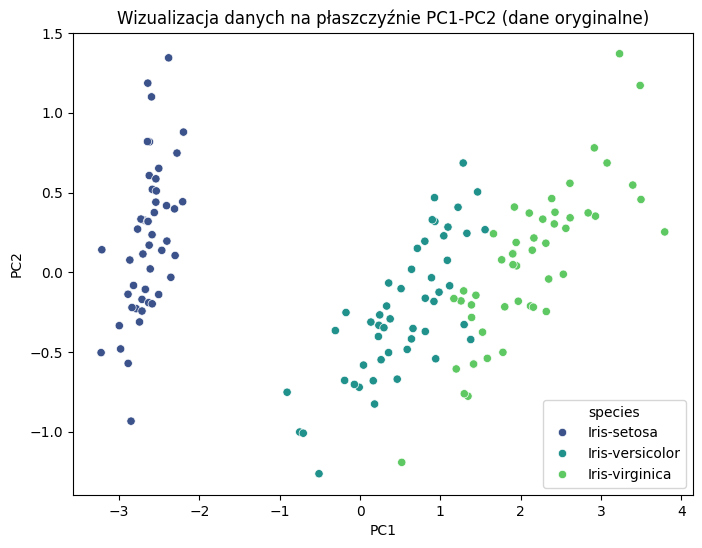

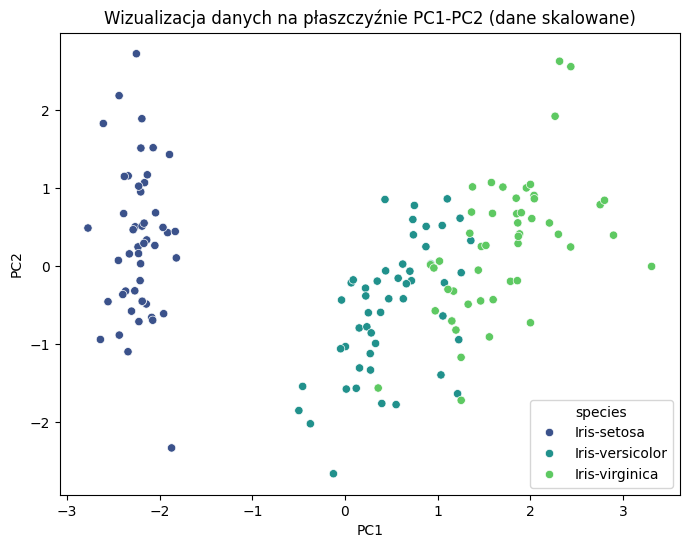

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#1. Wizualizacja danych na płaszczyźnie PC1-PC2 (dane oryginalne)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_original[:, 0], y=X_pca_original[:, 1], hue=y, palette='viridis')
plt.title('Wizualizacja danych na płaszczyźnie PC1-PC2 (dane oryginalne)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#2. Wizualizacja danych na płaszczyźnie PC1-PC2 (dane skalowane)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis')
plt.title('Wizualizacja danych na płaszczyźnie PC1-PC2 (dane skalowane)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

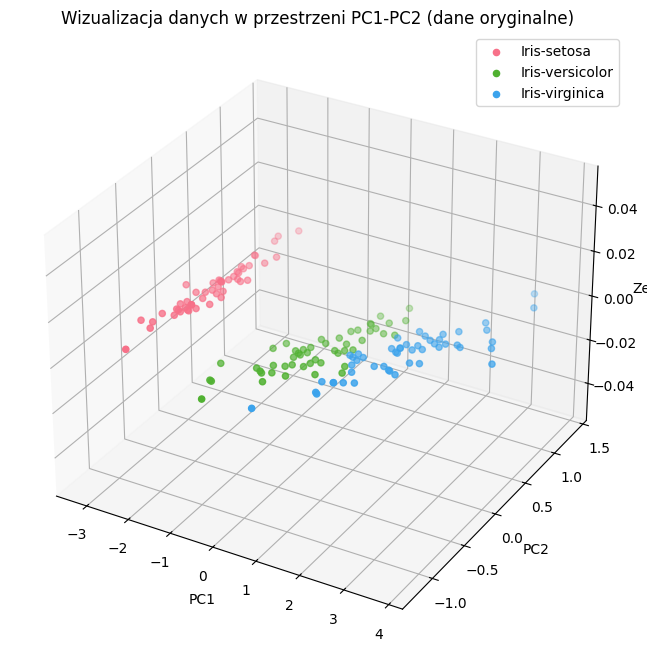

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

#3. Wizualizacja danych w przestrzeni PC1-PC2-PC3 (dane oryginalne)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ustawienie unikalnych kolorów dla każdej klasy
colors = sns.color_palette("husl", n_colors=len(np.unique(y)))

for i, class_label in enumerate(np.unique(y)):
    class_indices = (y == class_label)
    ax.scatter(X_pca_original[class_indices, 0], X_pca_original[class_indices, 1], np.zeros_like(X_pca_original[class_indices, 0]),
               label=class_label, color=colors[i])

ax.set_title('Wizualizacja danych w przestrzeni PC1-PC2 (dane oryginalne)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Zero')
ax.legend()
plt.show()


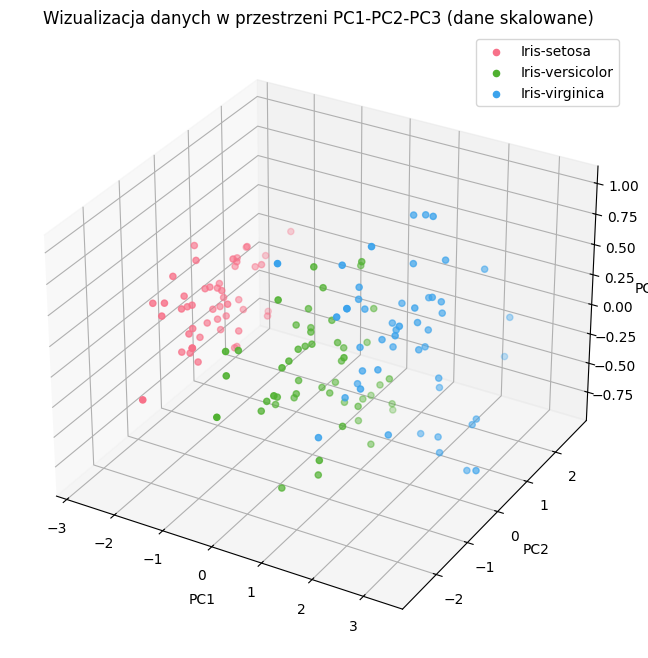

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

#4. Wizualizacja danych w przestrzeni PC1-PC2-PC3 (dane skalowane)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Ustawienie unikalnych kolorów dla każdej klasy
colors = sns.color_palette("husl", n_colors=len(np.unique(y)))

for i, class_label in enumerate(np.unique(y)):
    class_indices = (y == class_label)
    ax.scatter(X_pca_3[class_indices, 0], X_pca_3[class_indices, 1], X_pca_3[class_indices, 2],
               label=class_label, color=colors[i])

ax.set_title('Wizualizacja danych w przestrzeni PC1-PC2-PC3 (dane skalowane)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()